# 2. Simulation

In [1]:
# Import the libraries
import numpy as np 

import scipy as sci
from scipy.integrate import solve_ivp 

import time
import matplotlib.pyplot as plt 
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Set initial conditions and constants
m1 = 1
m2 = 1
m3 = 1

init_pos_1 = [1.0, 0]
init_pos_2 = [1.0, 1.0]
init_pos_3 = [0.0, 1.0]

init_vel_1 = [0.0, 0.0]
init_vel_2 = [0.0, 0.0]
init_vel_3 = [0.0, 0.0]

In [2]:
# Symmetric rotating triangle 

init_pos_1 = np.array([ 1.0, 0.0])
init_pos_2 = np.array([-0.5, np.sqrt(3)/2])
init_pos_3 = np.array([-0.5, -np.sqrt(3)/2])

# same mass
m1 = m2 = m3 = 1.0

# velocities for rigid body rotation
omega = 0.8
init_vel_1 = np.array([0,  omega])
init_vel_2 = np.array([0.7*omega, -0.35*omega])
init_vel_3 = np.array([-0.7*omega, -0.35*omega])


In [3]:
init_cond = np.array([
    init_pos_1, init_pos_2, init_pos_3,
    init_vel_1, init_vel_2, init_vel_3 
]).ravel()
#ravel to make it one dimensional to satisfy solve_ivp conditions
#init_cond needs to be an array as s variable in def system_odes also needs to be an array

In [4]:
# Define the system of ODE

def system_odes(t, s, m1, m2, m3):

    r1, r2, r3 = s[0:2], s[2:4], s[4:6]
    dr1_dt, dr2_dt, dr3_dt = s[6:8], s[8:10], s[10:12]

    v1, v2, v3 = dr1_dt, dr2_dt, dr3_dt

    dv1_dt = m3*(r3 - r1)/np.linalg.norm(r3 - r1)**3 + m2*(r2 - r1)/np.linalg.norm(r2 - r1)**3
    dv2_dt = m3*(r3 - r2)/np.linalg.norm(r3 - r2)**3 + m1*(r1 - r2)/np.linalg.norm(r1 - r2)**3
    dv3_dt = m1*(r1 - r3)/np.linalg.norm(r1 - r3)**3 + m2*(r2 - r3)/np.linalg.norm(r2 - r3)**3
    
    return np.array([v1, v2, v3, dv1_dt, dv2_dt, dv3_dt]).ravel()

In [5]:
# Solve the ODE RK4 
def rk4(t_n, v_n, k, m1, m2, m3):
    phi1 = system_odes(t_n, v_n, m1, m2, m3)
    phi2 = system_odes(t_n + k/2.0, v_n + (k/2.0)*phi1, m1, m2, m3)
    phi3 = system_odes(t_n + k/2.0, v_n + (k/2.0)*phi2, m1, m2, m3)
    phi4 = system_odes(t_n + k, v_n + k*phi3, m1, m2, m3)

    v_next = v_n + (k/6.0)*(phi1 + 2*phi2 + 2*phi3 + phi4)
    return v_next


def rk4_integrate(t_span, v0, k, m1, m2, m3):
    t0, tf = t_span
    N = int((tf - t0) / k)

    t_values = np.zeros(N+1)
    v_values = np.zeros((N+1, len(v0)))

    t_values[0] = t0
    v_values[0] = v0

    t_n = t0
    v_n = v0

    for i in range(1, N+1):
        v_n = rk4(t_n, v_n, k, m1, m2, m3)
        t_n = t_n + k

        t_values[i] = t_n
        v_values[i] = v_n

    return t_values, v_values

time_s, time_e = 1, 20
k = 0.01
t_rk4, sol_rk4 = rk4_integrate((time_s, time_e), init_cond, k, m1, m2, m3)

# --- Positions (RK4) ---
p1x_rk4 = sol_rk4[:, 0]
p1y_rk4 = sol_rk4[:, 1]

p2x_rk4 = sol_rk4[:, 2]
p2y_rk4 = sol_rk4[:, 3]

p3x_rk4 = sol_rk4[:, 4]
p3y_rk4 = sol_rk4[:, 5]

# --- Velocities (RK4) ---
v1x_rk4 = sol_rk4[:, 6]
v1y_rk4 = sol_rk4[:, 7]

v2x_rk4 = sol_rk4[:, 8]
v2y_rk4 = sol_rk4[:, 9]

v3x_rk4 = sol_rk4[:, 10]
v3y_rk4 = sol_rk4[:, 11]



In [6]:
# Solve the ODE RK45
time_s, time_e = 1, 20
t_points = np.linspace(time_s, time_e, 100)

solution = solve_ivp(
    fun=system_odes, #system of ODEs 
    t_span=(time_s, time_e), #time span
    y0= init_cond, #set initial conditions 
    t_eval = t_points, #array of times at which to store the computed solution
    args= (m1, m2, m3) #extra arguments, in our case are the masses
)

#from the solution we get the coordinates of the position
# Extract time vector
t_rk45 = solution.t

# --- Positions (RK45) ---
p1x_rk45 = solution.y[0]
p1y_rk45 = solution.y[1]

p2x_rk45 = solution.y[2]
p2y_rk45 = solution.y[3]

p3x_rk45 = solution.y[4]
p3y_rk45 = solution.y[5]

# --- Velocities (RK45) ---
v1x_rk45 = solution.y[6]
v1y_rk45 = solution.y[7]

v2x_rk45 = solution.y[8]
v2y_rk45 = solution.y[9]

v3x_rk45 = solution.y[10]
v3y_rk45 = solution.y[11]



## Trajectories 
### plot mass scenario 
- equal masses 
- one much larger mass
- solar system style 

### plot numerical method comparison 
compare RK4 vs RK45 
- energy drift plot 
- Step size evolution of RK45 (adaptive method)

### Plot  Local Error? 
- position error 

## Trajectories of the Three Bodies (Combined Version)

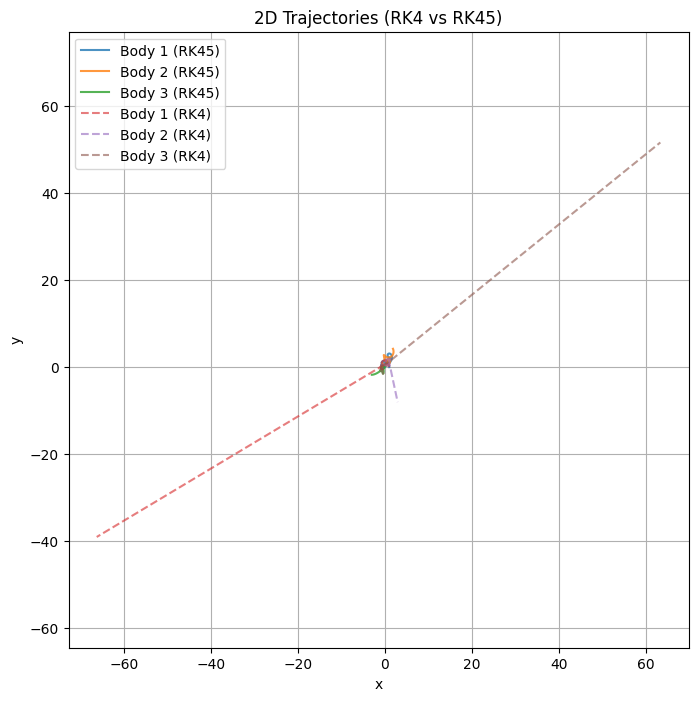

In [7]:
plt.figure(figsize=(8, 8))

# RK45 trajectories
plt.plot(p1x_rk45, p1y_rk45, label='Body 1 (RK45)', alpha=0.8)
plt.plot(p2x_rk45, p2y_rk45, label='Body 2 (RK45)', alpha=0.8)
plt.plot(p3x_rk45, p3y_rk45, label='Body 3 (RK45)', alpha=0.8)

# RK4 trajectories (dashed)
plt.plot(p1x_rk4, p1y_rk4, '--', label='Body 1 (RK4)', alpha=0.6)
plt.plot(p2x_rk4, p2y_rk4, '--', label='Body 2 (RK4)', alpha=0.6)
plt.plot(p3x_rk4, p3y_rk4, '--', label='Body 3 (RK4)', alpha=0.6)

plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Trajectories (RK4 vs RK45)')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


## Energy Drift Comparison (RK4 vs RK45)

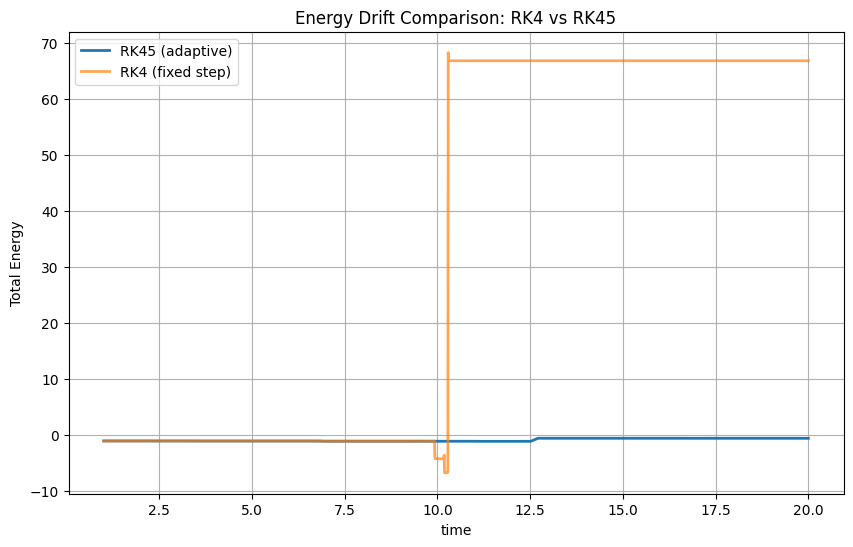

In [8]:
def total_energy(x1,y1,v1x,v1y, x2,y2,v2x,v2y, x3,y3,v3x,v3y, m1,m2,m3):
    # kinetic energy
    K  = 0.5*m1*(v1x**2 + v1y**2)
    K += 0.5*m2*(v2x**2 + v2y**2)
    K += 0.5*m3*(v3x**2 + v3y**2)
    
    # distances
    r12 = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    r13 = np.sqrt((x3-x1)**2 + (y3-y1)**2)
    r23 = np.sqrt((x3-x2)**2 + (y3-y2)**2)
    
    # potential energy (G = 1)
    U = - m1*m2/r12 - m1*m3/r13 - m2*m3/r23
    
    return K + U

E_rk45 = np.array([
    total_energy(
        p1x_rk45[i], p1y_rk45[i], v1x_rk45[i], v1y_rk45[i],
        p2x_rk45[i], p2y_rk45[i], v2x_rk45[i], v2y_rk45[i],
        p3x_rk45[i], p3y_rk45[i], v3x_rk45[i], v3y_rk45[i],
        m1, m2, m3
    )
    for i in range(len(t_rk45))
])

E_rk4 = np.array([
    total_energy(
        sol_rk4[i,0], sol_rk4[i,1], sol_rk4[i,6], sol_rk4[i,7],
        sol_rk4[i,2], sol_rk4[i,3], sol_rk4[i,8], sol_rk4[i,9],
        sol_rk4[i,4], sol_rk4[i,5], sol_rk4[i,10], sol_rk4[i,11],
        m1, m2, m3
    )
    for i in range(len(t_rk4))
])

plt.figure(figsize=(10, 6))

plt.plot(t_rk45, E_rk45, label='RK45 (adaptive)', linewidth=2)
plt.plot(t_rk4,  E_rk4,  label='RK4 (fixed step)', linewidth=2, alpha=0.7)

plt.xlabel('time')
plt.ylabel('Total Energy')
plt.title('Energy Drift Comparison: RK4 vs RK45')
plt.legend()
plt.grid(True)
plt.show()




## Adaptive Time Steps of RK45

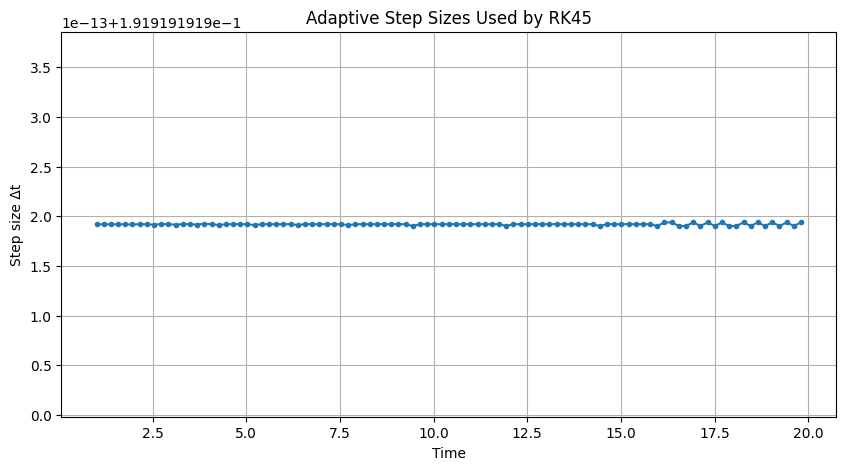

In [9]:
# Adaptive time steps of RK45
dt_rk45 = np.diff(t_rk45)

plt.figure(figsize=(10,5))
plt.plot(t_rk45[:-1], dt_rk45, marker='o', markersize=3)

plt.xlabel("Time")
plt.ylabel("Step size Δt")
plt.title("Adaptive Step Sizes Used by RK45")
plt.grid(True)
plt.show()


## Error Growth: RK4 vs RK45

In [10]:
# Interpolate RK4 (sol_rk4) onto RK45 time points for comparison
from scipy.interpolate import interp1d

interp_rk4 = interp1d(t_rk4, sol_rk4, axis=0, fill_value="extrapolate")
sol_rk4_interp = interp_rk4(t_rk45)


In [11]:
# Positions from RK45
pos_rk45 = np.vstack([
    p1x_rk45, p1y_rk45,
    p2x_rk45, p2y_rk45,
    p3x_rk45, p3y_rk45
]).T  # shape (N, 6)

# Positions from interpolated RK4
pos_rk4i = sol_rk4_interp[:, :6]

# Euclidean position error
error = np.linalg.norm(pos_rk45 - pos_rk4i, axis=1)


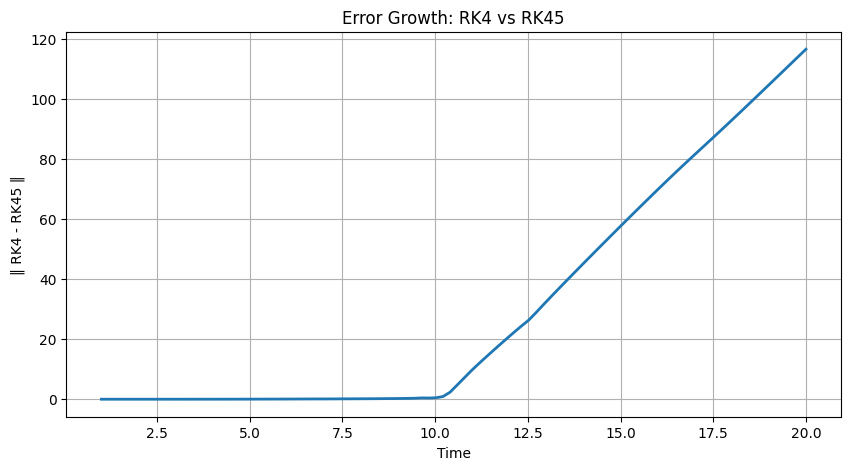

In [12]:
plt.figure(figsize=(10,5))
plt.plot(t_rk45, error, linewidth=2)

plt.xlabel("Time")
plt.ylabel("‖ RK4 - RK45 ‖")
plt.title("Error Growth: RK4 vs RK45")
plt.grid(True)
plt.show()
